In [6]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits

from setup import *
from FullFrame import FullFrame

from scipy.interpolate import interp1d

##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

###################
###   WASP52b   ###
###################
obs_date='ut20160811'
#obs_date='ut20160922'
obj_name='Wasp52'

midtime=['2016-08-11T04:51:00']               #time of midtransit, Wasp-52b, Transit1
#midtime=['2016-09-22T04:44:00']               #time of midtransit, Wasp-52b, Transit2



path='/Volumes/ermay_ext/Magellan/'+obs_date+'/'
data_path=path+obj_name+'_Spec/'      #path to where your data is saved
flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH=path+'SaveData_'+obj_name+'/'

wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn



from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)

import os

2048 4096


In [7]:
width=200

import os
import matplotlib.colors as mcolors

raw_data_binns=np.load(SAVEPATH+'LC_bins_'+str(int(width))+'.npz')['data']

dat=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')
lc_data_binns=dat['data']
cw_noise=dat['cw']
rmse=dat['rmse']
#polyfit=dat['polyfit']
bin_ctr=dat['bin_ctr']
n_bins=len(bin_ctr)

lc_data_white=np.load(SAVEPATH+'LCwhite_br.npz')['data']

bin_arr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bins']

t=np.load(SAVEPATH+'Obs_times.npz')['times']
n_exp=len(t)

###############
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr),vmax=np.max(bin_ctr))                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
################

lc_fit=np.empty([n_exp,n_bins])
lc_data=np.empty([n_exp,n_bins])

#b=0
lcwhite=(np.load(SAVEPATH+'LightCurve_fits_white.npz')['lightcurve_fit'])
t0=-1.0*(np.load(SAVEPATH+'LightCurve_fits_white.npz')['params'])[0]
for b in range(0,len(bin_ctr)):
    filen='LightCurve_fits_'+str(int(bin_ctr[b]))+'.npz'
    if filen in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
        lc_fit[:,b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+filen)['lightcurve_fit'])


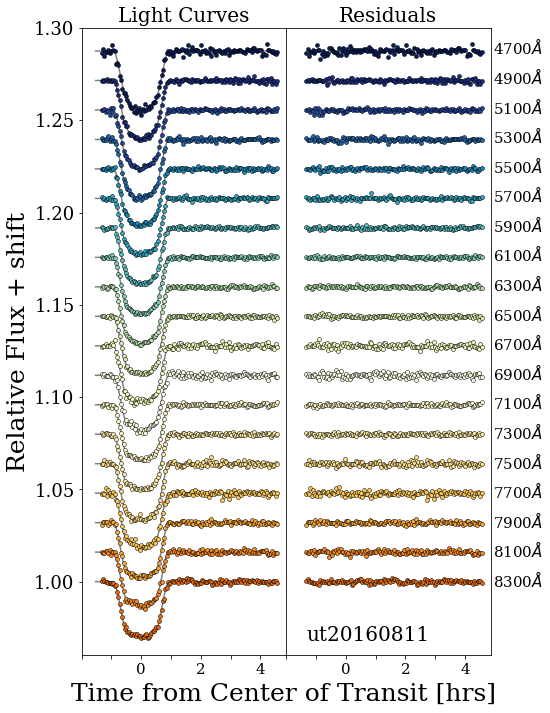

In [16]:
#plt.figure(figsize=(8.5,11))
#plt.figure(figsize=(10,7.5))
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,7.875))
#plt.figure(figsize=(8,5.25)) #half page size
#plt.figure(figsize=(8,3.5)) #third page size
fig,ax=plt.subplots(1,2,figsize=(8,10.5)) #full page rotated
fig.subplots_adjust(wspace=0, hspace=0)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.15,right=0.86)

shift=0
dv=45.
ymin=0.96
ymax=1.3

shift=0
for b in range(n_bins-5,-1,-1):
    if b==n_bins-1 or b==n_bins-2:
        continue
    ax[0].plot(24*(t[1:]+t0),lc_fit[1:,b]+shift,'-',color='grey')
    ax[0].plot(24*(t[1:]+t0),(lc_data_binns[1:,b])+shift,'.',markersize=8,markeredgecolor='black',markeredgewidth=0.5,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    #ax[1].plot(24*(t+t0),(polyfit[:,b])+shift,'-',color='grey',alpha=0.7)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[0].set_ylim(ymin,ymax)
ax[0].yaxis.set_tick_params(labelsize=18)
ax[0].xaxis.set_tick_params(labelsize=15)
ax[0].set_xticks([-2,-1,0,1,2,3,4])
ax[0].set_xticklabels(['','','0','','2','','4'])
ax[0].set_ylabel('Relative Flux + shift',fontsize=25)
ax[0].set_title('Light Curves',fontsize=20)  

shift=0
for b in range(n_bins-5,-1,-1):
    if b==n_bins-1 or b==n_bins-2:
        continue
    ax[1].plot(24*(t[1:]+t0),(lc_data_binns[1:,b]-lc_fit[1:,b]+shift),'.',markersize=8,markeredgecolor='black',markeredgewidth=0.5,markerfacecolor=scal_m.to_rgba(bin_ctr[b]))
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[1].set_ylim(ymin-1.0,ymax-1.0)
ax[1].set_yticks([])
ax[1].xaxis.set_tick_params(labelsize=15)
ax[1].set_xticks([-2,-1,0,1,2,3,4])
ax[1].set_xticklabels(['','','0','','2','','4'])
#ax[1].set_xlabel('Time [hrs]',fontsize=25)
ax[1].set_title('Residuals',fontsize=20)  

plt.figtext(0.5,0.06,'Time from Center of Transit [hrs]',fontsize=25,ha='center')

shift=0
for b in range(n_bins-5,-1,-1):
    if b==n_bins-1 or b==n_bins-2:
        continue
    plt.figtext(0.865,0.211+2.45*shift,str(int(bin_ctr[b]))+'$\AA$',color='black',fontsize=15)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
    
plt.figtext(0.54,0.14,'ut20160811',fontsize=20)

plt.savefig(SAVEPATH+'PLOTS/all_lcs_err_'+str(int(width))+'_new.pdf')    
plt.show()

In [19]:
import pickle

W52=pickle.load(open(SAVEPATH+'PLOTS/models/wasp52b.pickle'))
W52_spec=W52['spectra']
Tetal_rads=(((W52_spec['data_1'])['high'])['depth'])**(1./2.)
Tetal_errs=(((W52_spec['data_1'])['high'])['error'])
Tetal_errs=(0.5*Tetal_rads**(-1./2.))*Tetal_errs

Tetal_wavs=((W52_spec['data_1'])['high'])['wavelength']*10000.
Tetal_widt=((W52_spec['data_1'])['high'])['width']

Letal_wavs=np.linspace(4125,8625,19)
Letal_rads=np.array([0.1643,0.1632,0.1656,0.1641,0.1629,0.1619,0.1641,0.1639,0.1638,0.1640,0.1630,0.1645,0.1646,0.1652,0.1651,0.1660,0.1658,0.1664,0.1675])
Letal_errs=np.array([14,13,12,10,9,8,11,10,7,9,6,7,8,8,8,6,7,16,16])/10000.

Cetal_wavs=np.array([5306,5471,5636,5800,5891,5981,6147,6312,6477,6642,6807,6972,7137,7302,7467,7665,7682,7699,7790,7955,8120,8285,8450,8615,8780,8945])
Cetal_widt=np.array([165,165,165,165,16,165,165,165,165,165,165,165,165,165,165,16,18,16,165,165,165,165,165,165,165,165])
Cetal_rads=np.array([0.1624,0.1624,0.1608,0.1588,0.1717,0.1596,0.1610,0.1611,0.1604,0.1616,0.1617,0.1635,0.1613,0.1614,0.1608,0.1651,0.1608,0.1626,0.1623,0.1595,0.1609,0.1598,0.1609,0.1599,0.1612,0.1606])
Cetal_errs=np.array([15,16,19,11,30,16,9,8,8,7,11,12,11,11,9,20,21,21,11,11,12,10,12,16,16,16])/10000.

Cetal_rads+=0.004

In [20]:
width=200

bin_counts=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_counts']  #[n_exp,numbins,n_obj]
ptn_err=np.sqrt(bin_counts)
ppm_tar=1./ptn_err[:,:,0]

ppm_tar_exp=np.nanmedian(ppm_tar,axis=0)

print ppm_tar_exp.shape
print ppm_tar_exp*10**6.



(145,)
[4970.34050586 4741.72795016 4730.33348808 4720.0059922  4717.05205511
 4705.77046571 4694.48439819 4682.47745549 4673.96313186 4670.21636847
 4658.89605541 4642.46197448 4650.96392618 4630.5409647  4615.7703399
 4616.18809437 4607.82744515 4608.62999424 4625.51206418 4615.92837506
 4607.96225588 4581.16085876 4571.42995173 4600.55109293 4558.42651959
 4573.51965432 4551.82277253 4569.2725587  4557.6431037  4573.95002191
 4537.0758309  4561.87624825 4548.9621571  4556.58481439 4508.12702985
 4527.17243916 4508.81479427 4541.07093916 4518.60095672 4505.55697904
 4487.53065245 4491.85298066 4486.37291212 4500.14764387 4499.4559738
 4497.24979989 4493.88797232 4491.76539023 4483.39204241 4483.89709459
 4478.77647371 4480.19951502 4474.67717243 4470.56066321 4469.86227434
 4468.33948138 4457.45320175 4455.28414325 4464.44403234 4465.93221305
 4461.17326668 4465.09745397 4466.41748258 4455.78787384 4455.73998216
 4454.47815801 4455.04120876 4443.73269146 4448.09962042 4450.53921364
 

In [21]:
bin_ctr_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['bin_ctr']
rp_200=np.empty([len(bin_ctr_200)])
rp_e_200=np.empty([len(bin_ctr_200)])

            
b=0
for file in os.listdir(SAVEPATH+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200):
            rbwhite_200=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[2]
        else:
            rp_200[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[2]
            rp_e_200[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[0,0])
#            rs_e_200[b]=np.abs(np.nanmedian(np.load(SAVEPATH+'Fits_200/'+file)['residuals']))*10**-6
            b+=1
            

18
[ 4400.  4600.  4800.  5000.  5200.  5400.  5600.  5800.  6000.  6200.
  6400.  6600.  6800.  7000.  7200.  7400.  7600.  7800.  8000.  8200.
  8400.]


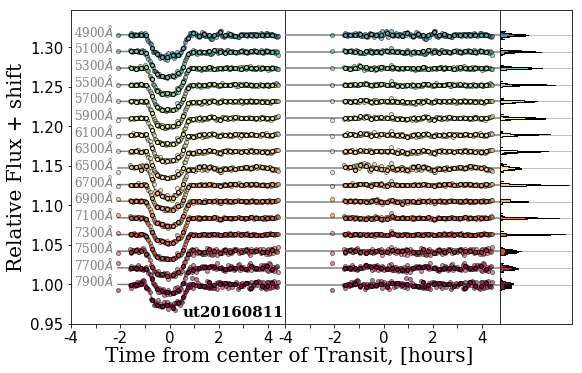

In [15]:
width=200
##############

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

import matplotlib.gridspec as gridspec

import os
###############

lc_data_binns=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['data']
lc_data_white=np.load(SAVEPATH+'LCwhite_br.npz')['data']


t_z=np.load(SAVEPATH+'LCwhite_br.npz')['avt']
            
#lc_data_white_z=np.load(SAVEPATH+'LCwhite_br_Corr.npz')['avf']
lc_data_binns_z=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['avf']


bin_arr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bins']
bin_ctr=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
n_bins=len(bin_ctr)

print n_bins

bin_arr=np.append(bin_arr,[bin_arr[-1]+width,bin_arr[-1]+2*width])
print bin_arr

###############
norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr),vmax=np.max(bin_ctr))                                                                                                                 
colors=matplotlib.cm.Spectral_r
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
################

t=np.load(SAVEPATH+'Obs_times.npz')['times']
n_exp=len(t)


lc_fit=np.empty([n_exp,n_bins])
lc_fit_z=np.empty([len(t_z),n_bins])
lc_data=np.empty([n_exp,n_bins])
#lc_data_z=np.empty([len(t_z),n_bins])


###############

b=0
for file in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr):
            lcwhite=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['lightcurve_fit'])
        else:
            lc_fit[:,b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['lightcurve_fit'])
            lc_fit_z[:,b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['lcfitz'])
            b+=1

#lcwhite=np.load(SAVEPATH+'Fits_'+str(int(width))+'/LightCurve_fits_spot.npz')['lightcurve_fit']
lcwhite=np.load(SAVEPATH+'Fits_'+str(int(width))+'/LightCurve_fits_white.npz')['lightcurve_fit']
            
white_res=lcwhite-lc_data_white
for b in range(0,n_bins):
    lc_data_binns[:,b]+=white_res
            
#plt.figure(figsize=(8.5,11))
#plt.figure(figsize=(10,7.5))
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,7.875))
plt.figure(figsize=(8,5.25)) #half page size
#plt.figure(figsize=(8,3.5)) #third page size

plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.99)
gs1=gridspec.GridSpec(1,7)
gs1.update(wspace=0.00,hspace=0.0)


ymin=0.95
ymax=1.01

shift=np.linspace(0,n_bins/35., n_bins+1)
shift=0
dv=45.
p0=plt.subplot(gs1[:,:3])
for b in range(n_bins-1,-1,-1):
    if b==0 or b==1:
        continue
    p0=plt.plot(24*t[:],lc_fit[:,b]+shift,'-',linewidth=1.5,color='grey',zorder=10)
    p0=plt.plot(24*t[:-1],lc_data_binns[:-1,b]+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=11,alpha=0.5)
    #p0=plt.annotate(str(int(bin_ctr[b]))+'$\AA$',xy=(-3.8,1.0+shift-0.002),ha='left',fontproperties=font,color='grey',fontsize=12)
    p0=plt.annotate(str(int(bin_ctr[b]))+'$\AA$',xy=(-3.9,1.0+shift-0.002),ha='left',fontproperties=font,color='grey',fontsize=12)

    p0=plt.plot(24*t_z[:-1],lc_data_binns_z[:-1,b]+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]+width),zorder=12)
    p0=plt.errorbar(24*t[:-1],lc_data_binns[:-1,b]+shift,yerr=ppm_tar_exp[b],ecolor=scal_m.to_rgba(bin_ctr[b]),elinewidth=0.5,alpha=0.7,fmt=None,zorder=11)
    shift+=(n_bins/dv)/(n_bins+1.)
p0=plt.xlim((t[0]-0.08)*24,(t[-1]+0.01)*24)
p0=plt.ylim(ymin,ymax+shift)
p0=plt.ylabel('Relative Flux + shift',fontsize=20,fontproperties=font)
p0=plt.yticks(fontsize=15)
#p0=plt.xticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4],['','','-4','', '-2','','0','','2','','4'],fontsize=15)
#p0=plt.xticks([-4,-3,-2,-1,0,1,2,3,4],['-4','', '-2','','0','','2','','4'],fontsize=15)
p0=plt.xticks([-4,-3,-2,-1,0,1,2,3,4],['-4','','-2','','0','','2','','4'],fontsize=15)
#p0=plt.xticks([-4,-3,-2,-1,0,1,2,3],['-4','','-2','','0','','2',''],fontsize=15)
    
residuals=lc_data_binns-lc_fit
residuals_z=lc_data_binns_z-lc_fit_z

shift=0
p1=plt.subplot(gs1[:,3:6])
for b in range(n_bins-1,-1,-1):
    if b==0 or b==1:
        continue
    p1=plt.axhline(y=np.nanmean((residuals[:-1,b])+shift),color='grey',linewidth=1.5,zorder=10)
    p1=plt.plot(24*t[:-1],(residuals[:-1,b])+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=11,alpha=0.5)
    
    p1=plt.plot(24*t_z[:-1],(residuals_z[:-1,b])+shift,'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]+width),zorder=12)
    p1=plt.errorbar(24*t[:-1],(residuals[:-1,b])+shift,yerr=ppm_tar_exp[b],ecolor=scal_m.to_rgba(bin_ctr[b]),elinewidth=0.5,alpha=0.7,fmt=None,zorder=11)
    shift+=(n_bins/dv)/(n_bins+1.)
p1=plt.yticks([],[])
#p1=plt.xticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4],['','','-4','', '-2','','0','','2','','4'],fontsize=15)
p1=plt.xticks([-4,-3,-2,-1,0,1,2,3,4],['-4','','-2','','0','','2','','4'],fontsize=15)
#p1=plt.xticks([-3,-2,-1,0,1,2,3],['-2','','0','','2',''],fontsize=15)

p1=plt.ylim(ymin-1.0,ymax-1.0+shift)

p2=plt.subplot(gs1[:,6])
shift=0
for b in range(n_bins-1,-1,-1):
    if b==0 or b==1:
        continue
    finite=residuals[np.isfinite(residuals[:,b]),b]
    p2=plt.axhline(y=np.nanmean((residuals[:-1,b])+shift),color='grey',linewidth=0.5,zorder=10)
    p2=plt.hist((finite[:-1]+shift),bins=31,orientation='horizontal',histtype='stepfilled',edgecolor='black',facecolor=scal_m.to_rgba(bin_ctr[b]),normed=True,zorder=11)
    shift+=(n_bins/dv)/(n_bins+1.)
p2=plt.ylim(ymin-1.0,ymax-1.0+shift)
p2=plt.yticks([],[])
p2=plt.xticks([],[])
#plt.ylim(0.98,1.01+shift[-1])

plt.figtext(0.49,0.14,'ut20160811',fontsize=15,fontproperties=fontb,color='black',ha='right')

plt.figtext(0.5,0.02,'Time from center of Transit, [hours]', fontsize=20, ha='center',fontproperties=font)

plt.savefig(SAVEPATH+'PLOTS/all_lcs_err_'+str(int(width))+'_new.pdf')    

In [22]:
#5=c1 6=c2
bin_ctr_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['bin_ctr']

nbins=len(bin_ctr_200)


fit_c1=np.empty([nbins])*0.0
fit_c2=np.empty([nbins])*0.0

c1_err=np.empty([nbins])*0.0
c2_err=np.empty([nbins])*0.0

import os

b=0
for file in os.listdir(SAVEPATH+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200):
            print b, file
#            c1_white=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[5]
#            c2_white=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[6]
        else:
            fit_c1[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[5]
            fit_c2[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[6]
            c1_err[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[1])
            c2_err[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[2])
            b+=1
            
print fit_c1
print fit_c2

print c1_err
print c2_err

print bin_ctr_200

[0.7315475  0.71492285 0.6608261  0.6572863  0.59410473 0.56736957
 0.56642757 0.5330342  0.50377622 0.50748092 0.42309231 0.47820152
 0.40729478 0.40005364 0.3751786  0.41750122 0.37101535 0.39028146
 0.35158531 0.3003529  0.32659576 0.36713268 0.28008935]
[-0.0618008  -0.02319756 -0.00940007  0.05234523  0.05351732  0.07095742
  0.09766918  0.09741206  0.10672621  0.15722046  0.10334011  0.15816652
  0.11532714  0.1234983   0.12180803  0.17761808  0.15099756  0.18646677
  0.15679865  0.131801    0.15728387  0.20963182  0.14533551]
[0.0255555  0.01924469 0.01891302 0.0179291  0.0176561  0.01806825
 0.01706011 0.01618317 0.01645151 0.01691391 0.02349994 0.02362432
 0.01942437 0.01850811 0.0245415  0.02407803 0.01986536 0.02100127
 0.02011983 0.0230377  0.02452785 0.04986336 0.03714978]
[0.02035121 0.02167339 0.01838795 0.02195241 0.02044653 0.02133065
 0.02097816 0.02016696 0.02023144 0.02086063 0.01729927 0.02640323
 0.01911936 0.02020971 0.02009356 0.02660538 0.02263054 0.02393806
 0

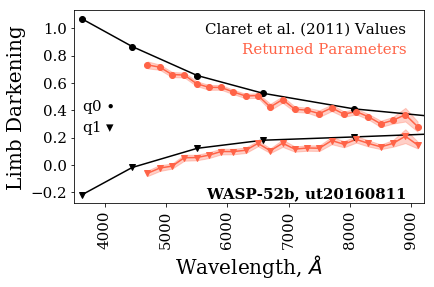

In [25]:
ft_c='tomato'

#_ac is CLARET TABLES
#_ft is FIT VALUES

c1_ft=fit_c1
c2_ft=fit_c2

#c1_ac=np.array([0.9264,0.7208,0.5216,0.4191,0.3307,0.1767])  #WASP4
#c2_ac=np.array([-0.0652,0.1033,0.2184,0.2481,0.2514,0.2922]) #WASP4
c1_ac=np.array([1.0666,0.8661,0.6538,0.5240,0.4100,0.2315])
c2_ac=np.array([-0.2171,-0.0193,0.1211,0.1803,0.2043,0.2752])
wave=[3640,4450,5510,6580,8060,12200]

bins=bin_ctr_200

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

plt.gcf().subplots_adjust(bottom=0.28,top=0.95,left=0.18,right=0.99)

plt.plot(wave,c1_ac,color='black')
plt.plot(bins,c1_ft,color=ft_c)
plt.plot(wave,c1_ac,'o',color='black')
plt.plot(bins,c1_ft,'o',color=ft_c)

plt.plot(wave,c2_ac,color='black')
plt.plot(bins,c2_ft,color=ft_c)
plt.plot(wave,c2_ac,'v',color='black')
plt.plot(bins,c2_ft,'v',color=ft_c)

plt.fill_between(bins,c1_ft-c1_err,c1_ft+c1_err,color=ft_c,alpha=0.3)
plt.fill_between(bins,c2_ft-c2_err,c2_ft+c2_err,color=ft_c,alpha=0.3)


plt.figtext(0.95,0.87,'Claret et al. (2011) Values',color='black',fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.95,0.80,'Returned Parameters',color=ft_c,fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.2,0.6,'q0 $\\bullet$',color='black',fontsize=15,fontproperties=font)
plt.figtext(0.2,0.53,'q1 $\\blacktriangledown$',color='black',fontsize=15,fontproperties=font)

plt.figtext(0.95,0.3,'WASP-52b, ut20160811',color='black',ha='right',fontsize=15,fontproperties=fontb)

plt.xticks(fontproperties=font,fontsize=15,rotation='vertical')
plt.yticks(fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\AA$',fontproperties=font,fontsize=20)
plt.ylabel('Limb Darkening',fontproperties=font,fontsize=20)

plt.xlim(3500,9200)

plt.savefig(SAVEPATH+'PLOTS/Claret_vs_fit_limbdark.pdf')
plt.show()

2241 2403


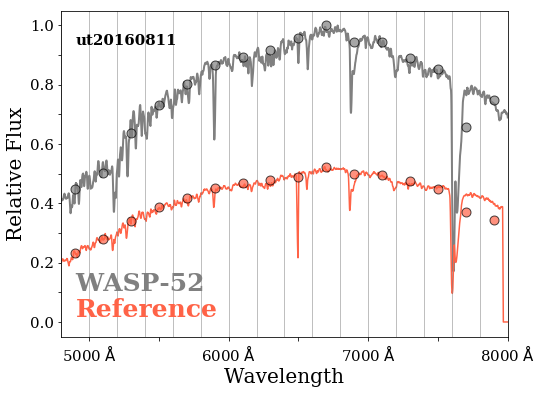

In [34]:
corr=False
width_bin=200

import scipy.signal

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['convolved']
#cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['data']
wav_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['wave']
#ptn_err=np.load(SAVEPATH+'FlattenedSpectra.npz')['pht_err']
#    tot_err=np.load(SAVEPATH+'FlattenedSpectra.npz')['tot_err']
binns=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_counts']
bin_a=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bins']
bin_c=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_centers']

cnt_arr=np.flip(cnt_arr,axis=2)
wav_arr=np.flip(wav_arr,axis=2)

#Wasp52
#-------
Cals_ind=[2]
#Cals_ind=[2,3,5,8]  
#csn=2

#Wasp4
#------
#1,4,5,7,8,10,11,12
#USE: 5,
#Cals_ind=[5]

#HatP26b
#-----
#1,2,3,4,5,6,7
# X 1
#------
#Cals_ind=[2,3,4,5,6]
#csn=2

#Cals=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_t=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_p=np.zeros_like(cnt_arr[0,0,:])
#for c in Cals_ind:
#    Cals=(np.nansum([Cals,cnt_arr[c,0,:]],axis=0))
#    errs_cw_t=np.sqrt(np.nansum([errs_cw_t,tot_err[c,0,:]**2.],axis=0))
#    errs_cw_p=np.sqrt(np.nansum([errs_cw_p,ptn_err[c,0,:]**2.],axis=0))

plt.figure(figsize=(8,6))

t=10
tar=scipy.signal.medfilt(cnt_arr[0,t,:]/np.nanmax(cnt_arr[0,t,:]),kernel_size=1)

#r1=1865
#r2=1878
#tar[r1:r2+1]=np.nan

tarc='gray'#'#5ab4ac'
calc='tomato'#'#d8b365'

bot=np.argmin(np.abs(wav_arr[0,t,:]-6600))
top=np.argmin(np.abs(wav_arr[0,t,:]-6800))
print bot, top

#med_bin0=np.nanmean(cnt_arr[0,t,bot:top]/np.nanmax(cnt_arr[0,t,:]))
#med_binc=np.nanmean(cnt_arr[c,t,bot:top]/np.nanmax(cnt_arr[c,t,:]))
#print med_bin0, med_binc

#for t in range(0,wav_arr.shape[1]):
plt.plot(wav_arr[0,t,:],tar,linewidth=2.0,color=tarc)
#for p in range(0,len(wav_arr[0,t,:])):
#    plt.annotate(p,xy=(wav_arr[0,t,p],tar[p]))
wav=np.linspace(4800,8200,4000)

t=10

t0=np.empty([cnt_arr.shape[2]])*np.nan
for c in Cals_ind:
    t0+=cnt_arr[c,t,:]
    
plt.plot(wav_arr[c,t,:],cnt_arr[2,t,:]/np.nanmax(cnt_arr[0,t,:]),linewidth=1.5,color=calc)

#plt.axvline(x=7593.7,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6867.19,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6562.81,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5895.9,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5889.9,color='grey',linewidth=0.5,linestyle='--')

for b in range(0,len(bin_a)):
    plt.axvline(x=bin_a[b],color='grey',linewidth=0.5)

plt.plot(bin_c,binns[0,t,:]/np.nanmax(binns[0,t,:]),'.',markersize=18,markeredgecolor='black',markerfacecolor=tarc,alpha=0.7)
for c in Cals_ind:
    plt.plot(bin_c,binns[c,t,:]/np.nanmax(binns[0,t,:]),'.',markersize=18,markeredgecolor='black',markerfacecolor=calc,alpha=0.7)                       


plt.xticks([5000,5500,6000,6500,7000,7500,8000],['5000 $\mathrm{\AA}$','','6000 $\mathrm{\AA}$','','7000 $\mathrm{\AA}$','','8000 $\mathrm{\AA}$'],fontsize=15,fontproperties=font)
plt.xlabel('Wavelength',fontsize=20,fontproperties=font)

plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],['0.0','','0.2','','0.4','','0.6','','0.8','','1.0'],fontsize=15,fontproperties=font)
plt.ylabel('Relative Flux',fontsize=20,fontproperties=font)

plt.figtext(0.15,0.23,'WASP-52',fontsize=25,fontproperties=fontb,color=tarc)
plt.figtext(0.15,0.17,'Reference',fontsize=25,fontproperties=fontb,color=calc)

plt.figtext(0.15,0.8,'ut20160811',fontsize=15,fontproperties=fontb,color='black')

plt.xlim(4800,8000)

plt.savefig(SAVEPATH+'PLOTS/Spectra_'+str(int(width_bin))+'.pdf')

In [35]:
for b in range(0,len(bin_ctr_200)):
    if b==0 or b==1:
        continue
    print bin_ctr_200[b], np.round(rp_200[b]-0.005,4), np.round(rp_e_200[b],5)
    
np.savez('/Users/ermay/Desktop/Wasp52_RadiusFits_Erin.npz',waves=bin_ctr_200,rads=rp_200,rads_e=rp_e_200)

print '********'
for b in range(0,len(bin_ctr_200)):
    if b==0 or b==1:
        continue
    print bin_ctr_200[b],np.round(fit_c1[b],3),np.round(c1_err[b],4),'     ', np.round(fit_c2[b],3), np.round(c2_err[b],4)

5100.0 0.1632 0.00037
5300.0 0.1634 0.00039
5500.0 0.1608 0.00036
5700.0 0.1605 0.00035
5900.0 0.1599 0.00032
6100.0 0.1613 0.00027
6300.0 0.162 0.00029
6500.0 0.1632 0.00032
6700.0 0.1625 0.00055
6900.0 0.1588 0.00057
7100.0 0.1604 0.00034
7300.0 0.1608 0.00033
7500.0 0.1622 0.00056
7700.0 0.1574 0.00059
7900.0 0.1601 0.00041
8100.0 0.1576 0.00046
8300.0 0.1609 0.00043
8500.0 0.1588 0.00047
8700.0 0.1564 0.00057
8900.0 0.1511 0.00151
9100.0 0.169 0.00134
********
5100.0 0.661 0.0189       -0.009 0.0184
5300.0 0.657 0.0179       0.052 0.022
5500.0 0.594 0.0177       0.054 0.0204
5700.0 0.567 0.0181       0.071 0.0213
5900.0 0.566 0.0171       0.098 0.021
6100.0 0.533 0.0162       0.097 0.0202
6300.0 0.504 0.0165       0.107 0.0202
6500.0 0.507 0.0169       0.157 0.0209
6700.0 0.423 0.0235       0.103 0.0173
6900.0 0.478 0.0236       0.158 0.0264
7100.0 0.407 0.0194       0.115 0.0191
7300.0 0.4 0.0185       0.123 0.0202
7500.0 0.375 0.0245       0.122 0.0201
7700.0 0.418 0.0241       0